In [1]:
import pandas as pd
df=pd.read_csv('wdbc.csv',header=None)
print(df.shape)
x=df.iloc[:,2:].values
y=df.iloc[:,1].values
df.isnull().sum()
import numpy as np
print(np.unique(y))
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
y=le.fit_transform(y)
print(np.unique(y))

(569, 32)
['B' 'M']
[0 1]


In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


model=[LogisticRegression(),
      LogisticRegression(penalty="l1"),
      LogisticRegression(penalty="l2")]
label=["lr","lr_l1","lr_l2"]
s=[]
for i in range(3):
    pip=Pipeline([("std",StandardScaler()),
             ("pca",PCA(n_components=2)),
             ("clf",model[i]),
                 ])
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    pip.fit(x_train,y_train)
    acc=pip.score(x_test,y_test)
    s.append(acc*100)
    print("Accuracy for  %s is %.2f"%(label[i],acc*100))
    
    

Accuracy for  lr is 93.57
Accuracy for  lr_l1 is 94.15
Accuracy for  lr_l2 is 93.57


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


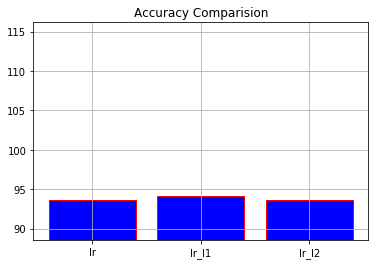

In [17]:
import matplotlib.pyplot as plt
plt.bar(label,s,edgecolor="red",facecolor="blue",width=0.8)
plt.grid()
plt.ylim(min(s)-5,max(s)+22)
plt.title("Accuracy Comparision")
plt.show()